In [1]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

In [2]:
northEndConnect = pd.read_csv("northendconnect.csv")

In [3]:
northEndConnect.columns

Index(['TEST ID', 'TEST DATE / UTC HOUR', 'GEO LATITUDE', 'GEO LONGITUDE',
       'DOWNLOAD SPEED', 'UPLOAD SPEED', 'JITTER', 'LATENCY', 'PACKET LOSS',
       'MOBILE TEST', 'ISP', 'CLIENT IP', 'CLIENT CITY', 'CLIENT PROVINCE',
       'CLIENT POSTAL CODE', 'AS NUMBER', 'IPV6 SUPPORTED', 'DNSSEC SUPPORTED',
       'TEST SERVER', 'browser_test_url', 'CONTRACTED DOWNLOAD SPEED',
       'CONTRACTED UPLOAD SPEED', 'CONTRACTED DATA CAP',
       'CONTRACTED MONTHLY COST', 'SERVICE TYPE', 'USER SATISFACTION',
       'CONNECTION TYPE', 'USER COMMENTS', 'HEATMAP_MUNICIPALITY',
       'HEATMAP_CENSUS_TRACTS', 'HEATMAP_PROJECT_AREA'],
      dtype='object')

In [4]:
northEndConnect.head()

,TEST ID,TEST DATE / UTC HOUR,GEO LATITUDE,GEO LONGITUDE,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,MOBILE TEST,...,CONTRACTED UPLOAD SPEED,CONTRACTED DATA CAP,CONTRACTED MONTHLY COST,SERVICE TYPE,USER SATISFACTION,CONNECTION TYPE,USER COMMENTS,HEATMAP_MUNICIPALITY,HEATMAP_CENSUS_TRACTS,HEATMAP_PROJECT_AREA
0,261,5/23/2015 10:00,49.869556,-97.296739,16.22,2.79,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020537.02,NaN
1,284,5/20/2015 10:01,49.852738,-97.270058,14.89,2.74,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020522.02,NaN
2,622,5/19/2015 10:00,49.887575,-97.140091,9.89,5.64,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020014.00,NaN
3,701,5/24/2015 10:00,49.814284,-97.160235,10.62,2.09,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020501.02,NaN
4,707,5/19/2015 10:00,49.882706,-97.161829,9.89,2.60,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020016.00,NaN


In [5]:
northEndConnect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TEST ID                    19311 non-null  int64  
 1   TEST DATE / UTC HOUR       19311 non-null  object 
 2   GEO LATITUDE               19311 non-null  float64
 3   GEO LONGITUDE              19311 non-null  float64
 4   DOWNLOAD SPEED             19311 non-null  float64
 5   UPLOAD SPEED               19311 non-null  float64
 6   JITTER                     11261 non-null  float64
 7   LATENCY                    11261 non-null  float64
 8   PACKET LOSS                11261 non-null  float64
 9   MOBILE TEST                19311 non-null  bool   
 10  ISP                        19310 non-null  object 
 11  CLIENT IP                  19311 non-null  object 
 12  CLIENT CITY                19256 non-null  object 
 13  CLIENT PROVINCE            19233 non-null  obj

In [6]:
northEndConnect.isnull().sum()/len(northEndConnect) * 100

TEST ID                       0.000000
TEST DATE / UTC HOUR          0.000000
GEO LATITUDE                  0.000000
GEO LONGITUDE                 0.000000
DOWNLOAD SPEED                0.000000
UPLOAD SPEED                  0.000000
JITTER                       41.686086
LATENCY                      41.686086
PACKET LOSS                  41.686086
MOBILE TEST                   0.000000
ISP                           0.005178
CLIENT IP                     0.000000
CLIENT CITY                   0.284812
CLIENT PROVINCE               0.403915
CLIENT POSTAL CODE            0.134638
AS NUMBER                     0.108746
IPV6 SUPPORTED                0.000000
DNSSEC SUPPORTED              0.000000
TEST SERVER                   0.000000
browser_test_url             35.813785
CONTRACTED DOWNLOAD SPEED    81.497592
CONTRACTED UPLOAD SPEED      88.503961
CONTRACTED DATA CAP          92.843457
CONTRACTED MONTHLY COST      83.781265
SERVICE TYPE                 78.649474
USER SATISFACTION        

### From the above line, it can be seen that the missing values in the columns
#### CONTRACTED DOWNLOAD SPEED, CONTRACTED UPLOAD SPEED, CONTRACTED DATA CAP, 
#### CONTRACTED MONTHLY COST, SERVICE TYPE, USER SATISFACTION, CONNECTION TYPE, USER 
#### COMMENTS and HEATMAP_PROJECT_AREA ARE MORE THAN FIFTY PERCENT (50%). 
#### Infact they are in their 70s, 80s, and 90 PERCENTS.¶

### These columns are CANDIDATES FOR REMOVAL.

## BLANK CELL

### Split the TEST DATE/UTC HOUR column into two columns.One holding TEST DATE and the other UTC HOUR¶¶

In [7]:
northEndConnectData_DateTimeSplit = northEndConnect
testDate = []
utcHour = []

for value in northEndConnect['TEST DATE / UTC HOUR']:
    spaceIndex = value.index(" ")
    dateData = value[:spaceIndex]
    timeData = value[spaceIndex:]
    testDate.append(dateData)
    utcHour.append(timeData)
    
northEndConnectData_DateTimeSplit.insert(2, "TEST DATE", testDate, True)
northEndConnectData_DateTimeSplit.insert(3, "TEST TIME",  utcHour, True)

northEndConnectData_DateTimeSplit

,TEST ID,TEST DATE / UTC HOUR,TEST DATE,TEST TIME,GEO LATITUDE,GEO LONGITUDE,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,...,CONTRACTED UPLOAD SPEED,CONTRACTED DATA CAP,CONTRACTED MONTHLY COST,SERVICE TYPE,USER SATISFACTION,CONNECTION TYPE,USER COMMENTS,HEATMAP_MUNICIPALITY,HEATMAP_CENSUS_TRACTS,HEATMAP_PROJECT_AREA
0,261,5/23/2015 10:00,5/23/2015,10:00,49.869556,-97.296739,16.22,2.79,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020537.02,NaN
1,284,5/20/2015 10:01,5/20/2015,10:01,49.852738,-97.270058,14.89,2.74,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020522.02,NaN
2,622,5/19/2015 10:00,5/19/2015,10:00,49.887575,-97.140091,9.89,5.64,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020014.00,NaN
3,701,5/24/2015 10:00,5/24/2015,10:00,49.814284,-97.160235,10.62,2.09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020501.02,NaN
4,707,5/19/2015 10:00,5/19/2015,10:00,49.882706,-97.161829,9.89,2.60,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020016.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19306,1625869,1/3/2023 23:24,1/3/2023,23:24,49.951400,-97.113300,407.27,101.35,0.24,31.73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020553.00,NaN
19307,1625902,1/4/2023 1:42,1/4/2023,1:42,49.919200,-97.126300,232.57,49.63,8.14,68.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020041.00,R2W
19308,1625936,1/4/2023 3:06,1/4/2023,3:06,49.855671,-97.280491,399.82,28.64,0.44,24.22,...,NaN,NaN,NaN,Home,NaN,Fibre,None,Winnipeg,6020521.02,NaN
19309,1625939,1/4/2023 3:08,1/4/2023,3:08,49.855671,-97.280491,420.26,24.28,0.30,35.07,...,NaN,NaN,NaN,Home,NaN,Fibre,None,Winnipeg,6020521.02,NaN


In [8]:
# Having split the "TEST DATE / UTC TIME" column into the TEST DATE and TEST TIME columns, we can
# Drop the "TEST DATE / UTC TIME" column.

northEndConnect_SplitDate_dropTESTDATE_UTCHOUR = northEndConnectData_DateTimeSplit.drop(columns = ['TEST DATE / UTC HOUR'])

northEndConnect_SplitDate_dropTESTDATE_UTCHOUR

,TEST ID,TEST DATE,TEST TIME,GEO LATITUDE,GEO LONGITUDE,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,...,CONTRACTED UPLOAD SPEED,CONTRACTED DATA CAP,CONTRACTED MONTHLY COST,SERVICE TYPE,USER SATISFACTION,CONNECTION TYPE,USER COMMENTS,HEATMAP_MUNICIPALITY,HEATMAP_CENSUS_TRACTS,HEATMAP_PROJECT_AREA
0,261,5/23/2015,10:00,49.869556,-97.296739,16.22,2.79,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020537.02,NaN
1,284,5/20/2015,10:01,49.852738,-97.270058,14.89,2.74,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020522.02,NaN
2,622,5/19/2015,10:00,49.887575,-97.140091,9.89,5.64,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020014.00,NaN
3,701,5/24/2015,10:00,49.814284,-97.160235,10.62,2.09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020501.02,NaN
4,707,5/19/2015,10:00,49.882706,-97.161829,9.89,2.60,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020016.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19306,1625869,1/3/2023,23:24,49.951400,-97.113300,407.27,101.35,0.24,31.73,3.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020553.00,NaN
19307,1625902,1/4/2023,1:42,49.919200,-97.126300,232.57,49.63,8.14,68.51,1.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020041.00,R2W
19308,1625936,1/4/2023,3:06,49.855671,-97.280491,399.82,28.64,0.44,24.22,17.22,...,NaN,NaN,NaN,Home,NaN,Fibre,None,Winnipeg,6020521.02,NaN
19309,1625939,1/4/2023,3:08,49.855671,-97.280491,420.26,24.28,0.30,35.07,2.55,...,NaN,NaN,NaN,Home,NaN,Fibre,None,Winnipeg,6020521.02,NaN


In [9]:
# Investigate the contents of the ISP column......

# Retrieve the contents of the ISP column as a DataFrame.
isp_Column = northEndConnect_SplitDate_dropTESTDATE_UTCHOUR[["ISP"]]

# Sort the contents of the obtained ISP column in ascending order. Save the change in the same DataFrame object.
isp_Column.sort_values('ISP', inplace = True, ascending = True) 

# Display the the Unique entries of the ISP column.
print(isp_Column['ISP'].unique())

isp_Column['ISP'].nunique()

['ACN' 'Access Communications  Co-operative Limited'
 'Access Communications Co-operative Limited' 'Akamai Technologies, Inc.'
 'Alberta Health Services' 'Alentus Corporation' 'Altima Telecom'
 'Amanah Tech' 'Amanah Tech Inc.' 'Amazon Technologies Inc.'
 'Amazon.com, Inc.' 'BH Telecom Corp.' 'BIGPIPE' 'Bell Canada' 'Bell MTS'
 'Bell MTS Data Centres G.P' 'Bell Mobility' 'Bell Mobility, Inc'
 'Business Development Bank of Canada' 'CIBC World Markets' 'CIK Telecom'
 'CIK Telecom INC' 'Canada Drugs' 'Cipherkey Exchange Corp.'
 'City of Winnipeg' 'Cloudflare, Inc.' 'Cogecodata'
 'Cogent Communications' 'Commstream Communications'
 'Commstream Communications Inc' 'Corridor Communications'
 'Corridor Communications, INC.' 'Corus Entertainment Inc'
 'Daemon Defense Systems' 'DataCamp Limited' 'DigitalOcean, LLC'
 'Epic Information Solutions' 'Fastnet Communications'
 'Full Throttle Networks' 'Full Throttle Networks Inc.'
 'GTCOMM - GloboTech Communications' 'GloboTech Communications'
 'Google

C:\Users\USER\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


132

### From the Unique entries of the ISP, it is obvious that there are discrepancies in some entries.
### Some correction is needed. These names need to be consistent to avoid errors¶¶

In [10]:
northEndConnect1 = northEndConnect_SplitDate_dropTESTDATE_UTCHOUR

for i in range(len(northEndConnect1)):
    if(northEndConnect1.loc[i, 'ISP'] == 'Access Communications  Co-operative Limited'):
        northEndConnect1 = northEndConnect1.replace('Access Communications  Co-operative Limited', 
                                                   'Access Communications Co-operative Limited')
        
    elif(northEndConnect1.loc[i, 'ISP'] == 'Amanah Tech'):
        northEndConnect1 = northEndConnect1.replace('Amanah Tech', 'Amanah Tech Inc.')
        
    elif(northEndConnect1.loc[i, 'ISP'] == 'Amazon.com, Inc.'):
        northEndConnect1 = northEndConnect1.replace('Amazon.com, Inc.', 'Amazon Technologies Inc.')
        
    elif(northEndConnect1.loc[i, 'ISP'] == 'Bell Mobility, Inc'):
        northEndConnect1 = northEndConnect1.replace('Bell Mobility, Inc', 'Bell Mobility')  
    
    elif(northEndConnect1.loc[i, 'ISP'] == 'CIK Telecom INC'):
        northEndConnect1 = northEndConnect1.replace('CIK Telecom INC', 'CIK Telecom')
        
    elif(northEndConnect1.loc[i, 'ISP'] == 'Commstream Communications Inc'):
        northEndConnect1 = northEndConnect1.replace('Commstream Communications Inc', 'Commstream Communications')    
        
    elif(northEndConnect1.loc[i, 'ISP'] == 'Corridor Communications, INC.'):
        northEndConnect1 = northEndConnect1.replace('Corridor Communications, INC.', 'Corridor Communications') 
        
    elif(northEndConnect1.loc[i, 'ISP'] == 'Full Throttle Networks Inc.'):
        northEndConnect1 = northEndConnect1.replace('Full Throttle Networks Inc.', 'Full Throttle Networks')
        
    elif(northEndConnect1.loc[i, 'ISP'] == 'GTCOMM - GloboTech Communications'):
        northEndConnect1 = northEndConnect1.replace('GTCOMM - GloboTech Communications', 'GloboTech Communications')    
        
               
    elif(northEndConnect1.loc[i, 'ISP'] == 'Shaw Communications Inc.'):
        northEndConnect1 = northEndConnect1.replace('Shaw Communications Inc.', 'Shaw Communications')     
    
    else:    
        pass

In [11]:
for i in range(len(northEndConnect1)):
    if(northEndConnect1.loc[i, 'ISP'] == 'MTS Allstream Inc.'):
        northEndConnect1 = northEndConnect1.replace('MTS Allstream Inc.', 'MTS Allstream')
        
    elif(northEndConnect1.loc[i, 'ISP'] == 'MTS Inc.'):
        northEndConnect1 = northEndConnect1.replace('MTS Inc.', 'MTS Inc')
        
    elif(northEndConnect1.loc[i, 'ISP'] == 'Manitoba First Nations Education Resource Centre Inc.'):
        northEndConnect1 = northEndConnect1.replace('Manitoba First Nations Education Resource Centre Inc.', 
                                                    'Manitoba First Nations Education Resource Centre')
        
    elif(northEndConnect1.loc[i, 'ISP'] == 'Manitoba Hydro International LTD') or (northEndConnect1.loc[i, 'ISP'] == 'Manitoba Hydro Telecom'):
        northEndConnect1 = northEndConnect1.replace('Manitoba Hydro International LTD', 'Manitoba Hydro') 
        northEndConnect1 = northEndConnect1.replace('Manitoba Hydro Telecom', 'Manitoba Hydro')
    
    elif(northEndConnect1.loc[i, 'ISP'] == 'Postmedia Network Inc'):
        northEndConnect1 = northEndConnect1.replace('Postmedia Network Inc', 'Postmedia Network')
        
    elif(northEndConnect1.loc[i, 'ISP'] == 'Red River College of Applied Arts'):
        northEndConnect1 = northEndConnect1.replace('Red River College of Applied Arts', 
                                                    'Red River College of Applied Arts, Science and Tec')    
        
    elif(northEndConnect1.loc[i, 'ISP'] == 'Rogers Communications Canada Inc.'):
        northEndConnect1 = northEndConnect1.replace('Rogers Communications Canada Inc.', 'Rogers Cable') 
        
    elif(northEndConnect1.loc[i, 'ISP'] == 'Radiant Communications Canada Ltd.'):
        northEndConnect1 = northEndConnect1.replace('Radiant Communications Canada Ltd.', 'Radiant Communications Canada')     
        
    elif(northEndConnect1.loc[i, 'ISP'] == 'Shaw Communications Inc.') or (northEndConnect1.loc[i, 'ISP'] == 'Shaw Telecom G.P.'):
        northEndConnect1 = northEndConnect1.replace('Shaw Communications Inc.', 'Shaw Communications')
        northEndConnect1 = northEndConnect1.replace('Shaw Telecom G.P.', 'Shaw Communications')
        
    elif(northEndConnect1.loc[i, 'ISP'] == 'Space Exploration Technologies Corporation') or (northEndConnect1.loc[i, 'ISP'] == 'SpaceX Services'):
        northEndConnect1 = northEndConnect1.replace('Space Exploration Technologies Corporation', 'SpaceX Starlink')
        northEndConnect1 = northEndConnect1.replace('SpaceX Services', 'SpaceX Starlink')
    
    else:    
        pass

In [12]:
for i in range(len(northEndConnect1)):
    if(northEndConnect1.loc[i, 'ISP'] == 'TELUS Communications Inc') or (northEndConnect1.loc[i, 'ISP'] == 'TELUS Communications Inc.'):
        northEndConnect1 = northEndConnect1.replace('TELUS Communications Inc', 'Telus Communications')
        northEndConnect1 = northEndConnect1.replace('TELUS Communications Inc.', 'Telus Communications')
        
    elif(northEndConnect1.loc[i, 'ISP'] == 'TeraGo Networks Inc.') or (northEndConnect1.loc[i, 'ISP'] == 'TeraGo Networks Inc'):
        northEndConnect1 = northEndConnect1.replace('TeraGo Networks Inc.', 'TeraGo Networks') 
        northEndConnect1 = northEndConnect1.replace('TeraGo Networks Inc', 'TeraGo Networks')    
        
    elif(northEndConnect1.loc[i, 'ISP'] == 'Total Server Solutions L.L.C'):
        northEndConnect1 = northEndConnect1.replace('Total Server Solutions L.L.C', 'Total Server Solutions L.L.C.')
        
    elif(northEndConnect1.loc[i, 'ISP'] == 'TekSavvy Solutions, Inc.'):
        northEndConnect1 = northEndConnect1.replace('TekSavvy Solutions, Inc.', 'TekSavvy Solutions')    
        
    elif(northEndConnect1.loc[i, 'ISP'] == 'VOI NET INC.'):
        northEndConnect1 = northEndConnect1.replace('VOI NET INC.', 'Voi Networks')
        
        
    elif(northEndConnect1.loc[i, 'ISP'] == 'Voyageur Internet Inc'):
        northEndConnect1 = northEndConnect1.replace('Voyageur Internet Inc', 'Voyageur Internet')
        
    
    elif(northEndConnect1.loc[i, 'ISP'] == 'Xplornet Communications Inc') or (northEndConnect1.loc[i, 'ISP'] == 'Xplornet Communications Inc.'):
        northEndConnect1 = northEndConnect1.replace('Xplornet Communications Inc', 'Xplornet Communications')
        northEndConnect1 = northEndConnect1.replace('Xplornet Communications Inc.', 'Xplornet Communications')
    
    else:    
        pass
    
values1 = northEndConnect1[['ISP']]  
values1.sort_values(by=['ISP'], inplace = True, ascending = True)
print(values1['ISP'].nunique())
print(northEndConnect1.shape)
values1['ISP'].unique()

100
(19311, 32)


array(['ACN', 'Access Communications Co-operative Limited',
       'Akamai Technologies, Inc.', 'Alberta Health Services',
       'Alentus Corporation', 'Altima Telecom', 'Amanah Tech Inc.',
       'Amazon Technologies Inc.', 'BH Telecom Corp.', 'BIGPIPE',
       'Bell Canada', 'Bell MTS', 'Bell MTS Data Centres G.P',
       'Bell Mobility', 'Business Development Bank of Canada',
       'CIBC World Markets', 'CIK Telecom', 'Canada Drugs',
       'Cipherkey Exchange Corp.', 'City of Winnipeg', 'Cloudflare, Inc.',
       'Cogecodata', 'Cogent Communications', 'Commstream Communications',
       'Corridor Communications', 'Corus Entertainment Inc',
       'Daemon Defense Systems', 'DataCamp Limited', 'DigitalOcean, LLC',
       'Epic Information Solutions', 'Fastnet Communications',
       'Full Throttle Networks', 'GloboTech Communications',
       'Google, LLC', 'Health Sciences Center', 'Hextet Systems',
       'High Speed Crow', 'Hurricane Electric IPv6 tunnel broker',
       'Hutteri

In [13]:
# Replacing the DataFrame with that having the Editted and Cleaned ISP names.

northEndConnect_SplitDate_dropTESTDATE_UTCHOUR = northEndConnect1

northEndConnect_SplitDate_dropTESTDATE_UTCHOUR

,TEST ID,TEST DATE,TEST TIME,GEO LATITUDE,GEO LONGITUDE,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,...,CONTRACTED UPLOAD SPEED,CONTRACTED DATA CAP,CONTRACTED MONTHLY COST,SERVICE TYPE,USER SATISFACTION,CONNECTION TYPE,USER COMMENTS,HEATMAP_MUNICIPALITY,HEATMAP_CENSUS_TRACTS,HEATMAP_PROJECT_AREA
0,261,5/23/2015,10:00,49.869556,-97.296739,16.22,2.79,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020537.02,NaN
1,284,5/20/2015,10:01,49.852738,-97.270058,14.89,2.74,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020522.02,NaN
2,622,5/19/2015,10:00,49.887575,-97.140091,9.89,5.64,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020014.00,NaN
3,701,5/24/2015,10:00,49.814284,-97.160235,10.62,2.09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020501.02,NaN
4,707,5/19/2015,10:00,49.882706,-97.161829,9.89,2.60,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020016.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19306,1625869,1/3/2023,23:24,49.951400,-97.113300,407.27,101.35,0.24,31.73,3.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020553.00,NaN
19307,1625902,1/4/2023,1:42,49.919200,-97.126300,232.57,49.63,8.14,68.51,1.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020041.00,R2W
19308,1625936,1/4/2023,3:06,49.855671,-97.280491,399.82,28.64,0.44,24.22,17.22,...,NaN,NaN,NaN,Home,NaN,Fibre,None,Winnipeg,6020521.02,NaN
19309,1625939,1/4/2023,3:08,49.855671,-97.280491,420.26,24.28,0.30,35.07,2.55,...,NaN,NaN,NaN,Home,NaN,Fibre,None,Winnipeg,6020521.02,NaN


### Remove the missing value rows in the columns for Jitter, Latency, and Packet Loss

In [14]:
northEndConnect_Remove_JLP_na_values = northEndConnect_SplitDate_dropTESTDATE_UTCHOUR

In [15]:
northEndConnect_Remove_JLP_na_values.dropna(subset = ['JITTER', 'LATENCY', 'PACKET LOSS'], inplace = True)

In [16]:
northEndConnect_Remove_JLP_na_values

,TEST ID,TEST DATE,TEST TIME,GEO LATITUDE,GEO LONGITUDE,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,...,CONTRACTED UPLOAD SPEED,CONTRACTED DATA CAP,CONTRACTED MONTHLY COST,SERVICE TYPE,USER SATISFACTION,CONNECTION TYPE,USER COMMENTS,HEATMAP_MUNICIPALITY,HEATMAP_CENSUS_TRACTS,HEATMAP_PROJECT_AREA
7969,805747,9/15/2019,16:46,49.908017,-97.069539,193.17,19.75,1.48,34.36,0.52,...,NaN,NaN,NaN,NaN,5.0,NaN,None,Winnipeg,6020130.02,NaN
7970,805777,9/15/2019,20:08,49.855453,-97.287733,57.92,16.05,2.81,40.71,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020521.01,NaN
7971,805828,9/16/2019,1:06,49.821856,-97.195052,2.17,10.92,11.99,51.75,1.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020500.11,NaN
7977,806633,9/17/2019,23:16,49.878040,-97.119845,26.92,14.23,7.10,57.43,0.02,...,NaN,NaN,90,Home,4.0,NaN,None,Winnipeg,6020114.00,NaN
7982,808371,9/21/2019,4:22,49.869896,-97.155372,14.34,3.74,2.07,62.16,1.10,...,NaN,NaN,90,Home,4.0,NaN,None,Winnipeg,6020003.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19306,1625869,1/3/2023,23:24,49.951400,-97.113300,407.27,101.35,0.24,31.73,3.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020553.00,NaN
19307,1625902,1/4/2023,1:42,49.919200,-97.126300,232.57,49.63,8.14,68.51,1.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020041.00,R2W
19308,1625936,1/4/2023,3:06,49.855671,-97.280491,399.82,28.64,0.44,24.22,17.22,...,NaN,NaN,NaN,Home,NaN,Fibre,None,Winnipeg,6020521.02,NaN
19309,1625939,1/4/2023,3:08,49.855671,-97.280491,420.26,24.28,0.30,35.07,2.55,...,NaN,NaN,NaN,Home,NaN,Fibre,None,Winnipeg,6020521.02,NaN


In [17]:
northEndConnect_Remove_JLP_na_values.isnull().sum()/len(northEndConnect_Remove_JLP_na_values) * 100

TEST ID                       0.000000
TEST DATE                     0.000000
TEST TIME                     0.000000
GEO LATITUDE                  0.000000
GEO LONGITUDE                 0.000000
DOWNLOAD SPEED                0.000000
UPLOAD SPEED                  0.000000
JITTER                        0.000000
LATENCY                       0.000000
PACKET LOSS                   0.000000
MOBILE TEST                   0.000000
ISP                           0.000000
CLIENT IP                     0.000000
CLIENT CITY                   0.000000
CLIENT PROVINCE               0.000000
CLIENT POSTAL CODE            0.000000
AS NUMBER                     0.008880
IPV6 SUPPORTED                0.000000
DNSSEC SUPPORTED              0.000000
TEST SERVER                   0.000000
browser_test_url              0.000000
CONTRACTED DOWNLOAD SPEED    75.135423
CONTRACTED UPLOAD SPEED      80.356984
CONTRACTED DATA CAP          87.798597
CONTRACTED MONTHLY COST      79.273599
SERVICE TYPE             

In [18]:
northEndConnect_Remove_JLP_na_values.reset_index(inplace = True)

In [19]:
northEndConnect_Remove_JLP_na_values

,index,TEST ID,TEST DATE,TEST TIME,GEO LATITUDE,GEO LONGITUDE,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,...,CONTRACTED UPLOAD SPEED,CONTRACTED DATA CAP,CONTRACTED MONTHLY COST,SERVICE TYPE,USER SATISFACTION,CONNECTION TYPE,USER COMMENTS,HEATMAP_MUNICIPALITY,HEATMAP_CENSUS_TRACTS,HEATMAP_PROJECT_AREA
0,7969,805747,9/15/2019,16:46,49.908017,-97.069539,193.17,19.75,1.48,34.36,...,NaN,NaN,NaN,NaN,5.0,NaN,None,Winnipeg,6020130.02,NaN
1,7970,805777,9/15/2019,20:08,49.855453,-97.287733,57.92,16.05,2.81,40.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020521.01,NaN
2,7971,805828,9/16/2019,1:06,49.821856,-97.195052,2.17,10.92,11.99,51.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020500.11,NaN
3,7977,806633,9/17/2019,23:16,49.878040,-97.119845,26.92,14.23,7.10,57.43,...,NaN,NaN,90,Home,4.0,NaN,None,Winnipeg,6020114.00,NaN
4,7982,808371,9/21/2019,4:22,49.869896,-97.155372,14.34,3.74,2.07,62.16,...,NaN,NaN,90,Home,4.0,NaN,None,Winnipeg,6020003.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11256,19306,1625869,1/3/2023,23:24,49.951400,-97.113300,407.27,101.35,0.24,31.73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020553.00,NaN
11257,19307,1625902,1/4/2023,1:42,49.919200,-97.126300,232.57,49.63,8.14,68.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020041.00,R2W
11258,19308,1625936,1/4/2023,3:06,49.855671,-97.280491,399.82,28.64,0.44,24.22,...,NaN,NaN,NaN,Home,NaN,Fibre,None,Winnipeg,6020521.02,NaN
11259,19309,1625939,1/4/2023,3:08,49.855671,-97.280491,420.26,24.28,0.30,35.07,...,NaN,NaN,NaN,Home,NaN,Fibre,None,Winnipeg,6020521.02,NaN


In [20]:
northEndConnect_Remove_JLP_na_values.drop(columns = ['index'], inplace = True)

In [21]:
northEndConnect_Remove_JLP_na_values

,TEST ID,TEST DATE,TEST TIME,GEO LATITUDE,GEO LONGITUDE,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,...,CONTRACTED UPLOAD SPEED,CONTRACTED DATA CAP,CONTRACTED MONTHLY COST,SERVICE TYPE,USER SATISFACTION,CONNECTION TYPE,USER COMMENTS,HEATMAP_MUNICIPALITY,HEATMAP_CENSUS_TRACTS,HEATMAP_PROJECT_AREA
0,805747,9/15/2019,16:46,49.908017,-97.069539,193.17,19.75,1.48,34.36,0.52,...,NaN,NaN,NaN,NaN,5.0,NaN,None,Winnipeg,6020130.02,NaN
1,805777,9/15/2019,20:08,49.855453,-97.287733,57.92,16.05,2.81,40.71,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020521.01,NaN
2,805828,9/16/2019,1:06,49.821856,-97.195052,2.17,10.92,11.99,51.75,1.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020500.11,NaN
3,806633,9/17/2019,23:16,49.878040,-97.119845,26.92,14.23,7.10,57.43,0.02,...,NaN,NaN,90,Home,4.0,NaN,None,Winnipeg,6020114.00,NaN
4,808371,9/21/2019,4:22,49.869896,-97.155372,14.34,3.74,2.07,62.16,1.10,...,NaN,NaN,90,Home,4.0,NaN,None,Winnipeg,6020003.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11256,1625869,1/3/2023,23:24,49.951400,-97.113300,407.27,101.35,0.24,31.73,3.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020553.00,NaN
11257,1625902,1/4/2023,1:42,49.919200,-97.126300,232.57,49.63,8.14,68.51,1.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020041.00,R2W
11258,1625936,1/4/2023,3:06,49.855671,-97.280491,399.82,28.64,0.44,24.22,17.22,...,NaN,NaN,NaN,Home,NaN,Fibre,None,Winnipeg,6020521.02,NaN
11259,1625939,1/4/2023,3:08,49.855671,-97.280491,420.26,24.28,0.30,35.07,2.55,...,NaN,NaN,NaN,Home,NaN,Fibre,None,Winnipeg,6020521.02,NaN


In [22]:
northEndConnect_Remove_JLP_na_values.describe()

,TEST ID,GEO LATITUDE,GEO LONGITUDE,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,USER SATISFACTION,HEATMAP_CENSUS_TRACTS
count,1.126100e+04,11261.000000,11261.000000,11261.000000,11261.000000,11261.000000,1.126100e+04,11261.000000,2515.000000,1.126100e+04
mean,1.260136e+06,49.860089,-97.134560,93.427601,21.122358,7.346237,4.288737e+02,1.855992,3.001193,6.020204e+06
std,2.109877e+05,0.047946,0.062574,111.871155,52.652149,54.123990,4.047312e+04,4.231932,1.325504,2.056257e+02
min,8.057470e+05,49.738334,-97.338454,0.020000,0.000000,0.010000,1.000000e-01,0.000000,1.000000,6.020001e+06
25%,1.193335e+06,49.828721,-97.163537,16.840000,2.580000,0.900000,3.607000e+01,0.000000,2.000000,6.020048e+06
50%,1.219187e+06,49.863247,-97.126300,53.340000,7.300000,2.050000,4.046000e+01,0.040000,3.000000,6.020100e+06
75%,1.411147e+06,49.895061,-97.086947,118.620000,14.950000,5.120000,5.399000e+01,1.220000,4.000000,6.020500e+06
max,1.625940e+06,49.973807,-96.960752,941.740000,932.900000,4368.640000,4.294967e+06,47.850000,5.000000,6.020560e+06


In [23]:
# Removing the Outlandish Latency Value, given by the MAX function from the
# DESCRIPTIVE STATISTICS performed


for i in range(len(northEndConnect_Remove_JLP_na_values)):
    if (northEndConnect_Remove_JLP_na_values.loc[i, "LATENCY"] >= 400000):
        northEndConnect_Remove_JLP_na_values.drop(index = i, inplace = True)
    else:
        pass

In [24]:
northEndConnect_Remove_JLP_na_values.describe()

,TEST ID,GEO LATITUDE,GEO LONGITUDE,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,USER SATISFACTION,HEATMAP_CENSUS_TRACTS
count,1.126000e+04,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,2514.000000,1.126000e+04
mean,1.260113e+06,49.860087,-97.134553,93.435877,21.124032,7.280282,47.475978,1.854734,3.001591,6.020204e+06
std,2.109822e+05,0.047948,0.062572,111.872675,52.654188,53.671930,33.486746,4.230011,1.325617,2.056117e+02
min,8.057470e+05,49.738334,-97.338454,0.020000,0.000000,0.010000,0.100000,0.000000,1.000000,6.020001e+06
25%,1.193333e+06,49.828721,-97.163537,16.840000,2.580000,0.900000,36.070000,0.000000,2.000000,6.020048e+06
50%,1.219186e+06,49.863247,-97.126300,53.345000,7.300000,2.050000,40.460000,0.040000,3.000000,6.020100e+06
75%,1.410876e+06,49.895061,-97.086947,118.622500,14.950000,5.120000,53.982500,1.220000,4.000000,6.020500e+06
max,1.625940e+06,49.973807,-96.960752,941.740000,932.900000,4368.640000,1542.320000,47.850000,5.000000,6.020560e+06


In [25]:
northEndConnect_Remove_JLP_na_values.to_csv("northEndConnect_Remove_JLP_na_values.csv")

In [26]:
# Obtain the Area Code from the Postal Code

northEndConnect_GetAreaCode_from_PostalCode = northEndConnect_Remove_JLP_na_values

areaCode = []

for code in northEndConnect_GetAreaCode_from_PostalCode['CLIENT POSTAL CODE']:
    aCode = code[:3]
    areaCode.append(aCode)
    
northEndConnect_GetAreaCode_from_PostalCode["AREA_CODE"] = areaCode

In [27]:
northEndConnect_GetAreaCode_from_PostalCode

,TEST ID,TEST DATE,TEST TIME,GEO LATITUDE,GEO LONGITUDE,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,...,CONTRACTED DATA CAP,CONTRACTED MONTHLY COST,SERVICE TYPE,USER SATISFACTION,CONNECTION TYPE,USER COMMENTS,HEATMAP_MUNICIPALITY,HEATMAP_CENSUS_TRACTS,HEATMAP_PROJECT_AREA,AREA_CODE
0,805747,9/15/2019,16:46,49.908017,-97.069539,193.17,19.75,1.48,34.36,0.52,...,NaN,NaN,NaN,5.0,NaN,None,Winnipeg,6020130.02,NaN,R2K
1,805777,9/15/2019,20:08,49.855453,-97.287733,57.92,16.05,2.81,40.71,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020521.01,NaN,R3R
2,805828,9/16/2019,1:06,49.821856,-97.195052,2.17,10.92,11.99,51.75,1.63,...,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020500.11,NaN,R3Y
3,806633,9/17/2019,23:16,49.878040,-97.119845,26.92,14.23,7.10,57.43,0.02,...,NaN,90,Home,4.0,NaN,None,Winnipeg,6020114.00,NaN,R2H
4,808371,9/21/2019,4:22,49.869896,-97.155372,14.34,3.74,2.07,62.16,1.10,...,NaN,90,Home,4.0,NaN,None,Winnipeg,6020003.00,NaN,R3M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11256,1625869,1/3/2023,23:24,49.951400,-97.113300,407.27,101.35,0.24,31.73,3.24,...,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020553.00,NaN,R2V
11257,1625902,1/4/2023,1:42,49.919200,-97.126300,232.57,49.63,8.14,68.51,1.80,...,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020041.00,R2W,R2W
11258,1625936,1/4/2023,3:06,49.855671,-97.280491,399.82,28.64,0.44,24.22,17.22,...,NaN,NaN,Home,NaN,Fibre,None,Winnipeg,6020521.02,NaN,R3R
11259,1625939,1/4/2023,3:08,49.855671,-97.280491,420.26,24.28,0.30,35.07,2.55,...,NaN,NaN,Home,NaN,Fibre,None,Winnipeg,6020521.02,NaN,R3R


In [28]:
northEndConnect_GetAreaCode_from_PostalCode.reset_index(inplace = True)

In [29]:
northEndConnect_GetAreaCode_from_PostalCode

,index,TEST ID,TEST DATE,TEST TIME,GEO LATITUDE,GEO LONGITUDE,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,...,CONTRACTED DATA CAP,CONTRACTED MONTHLY COST,SERVICE TYPE,USER SATISFACTION,CONNECTION TYPE,USER COMMENTS,HEATMAP_MUNICIPALITY,HEATMAP_CENSUS_TRACTS,HEATMAP_PROJECT_AREA,AREA_CODE
0,0,805747,9/15/2019,16:46,49.908017,-97.069539,193.17,19.75,1.48,34.36,...,NaN,NaN,NaN,5.0,NaN,None,Winnipeg,6020130.02,NaN,R2K
1,1,805777,9/15/2019,20:08,49.855453,-97.287733,57.92,16.05,2.81,40.71,...,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020521.01,NaN,R3R
2,2,805828,9/16/2019,1:06,49.821856,-97.195052,2.17,10.92,11.99,51.75,...,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020500.11,NaN,R3Y
3,3,806633,9/17/2019,23:16,49.878040,-97.119845,26.92,14.23,7.10,57.43,...,NaN,90,Home,4.0,NaN,None,Winnipeg,6020114.00,NaN,R2H
4,4,808371,9/21/2019,4:22,49.869896,-97.155372,14.34,3.74,2.07,62.16,...,NaN,90,Home,4.0,NaN,None,Winnipeg,6020003.00,NaN,R3M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,11256,1625869,1/3/2023,23:24,49.951400,-97.113300,407.27,101.35,0.24,31.73,...,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020553.00,NaN,R2V
11256,11257,1625902,1/4/2023,1:42,49.919200,-97.126300,232.57,49.63,8.14,68.51,...,NaN,NaN,NaN,NaN,NaN,NaN,Winnipeg,6020041.00,R2W,R2W
11257,11258,1625936,1/4/2023,3:06,49.855671,-97.280491,399.82,28.64,0.44,24.22,...,NaN,NaN,Home,NaN,Fibre,None,Winnipeg,6020521.02,NaN,R3R
11258,11259,1625939,1/4/2023,3:08,49.855671,-97.280491,420.26,24.28,0.30,35.07,...,NaN,NaN,Home,NaN,Fibre,None,Winnipeg,6020521.02,NaN,R3R


In [30]:
northEndConnect_GetAreaCode_from_PostalCode.drop(columns = ['index'], inplace = True)

In [31]:
# Categorize the Nature of Internet Service . . . . 

Area_InternetCategory = northEndConnect_GetAreaCode_from_PostalCode


InternetCategory = []

for value in range(len(Area_InternetCategory)):
    if((Area_InternetCategory.loc[value, 'DOWNLOAD SPEED'] >= 50) 
    and (Area_InternetCategory.loc[value, 'UPLOAD SPEED'] >= 10) 
    and (Area_InternetCategory.loc[value, 'JITTER'] <= 5) 
    and (Area_InternetCategory.loc[value, 'LATENCY'] <= 50) 
    and (Area_InternetCategory.loc[value, 'PACKET LOSS'] <= 0.25)):
        
        internetStatus = "Good Internet Quality"
        
    else:
        
        internetStatus = "Poor Internet Quality"
        
    InternetCategory.append(internetStatus) 
    
Area_InternetCategory["INTERNET_CATEGORY"] = InternetCategory    

In [32]:
# Drop Columns that are not useful.....

northEndConnect_DropInEffective_Columns = Area_InternetCategory.drop(columns = ['browser_test_url', 'CONTRACTED DOWNLOAD SPEED','CONTRACTED UPLOAD SPEED',
                                                                                'CONTRACTED DATA CAP','SERVICE TYPE', 'USER SATISFACTION', 'USER COMMENTS',
                                                                                'HEATMAP_PROJECT_AREA'])

In [33]:
northEndConnect_DropInEffective_Columns

,TEST ID,TEST DATE,TEST TIME,GEO LATITUDE,GEO LONGITUDE,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,...,AS NUMBER,IPV6 SUPPORTED,DNSSEC SUPPORTED,TEST SERVER,CONTRACTED MONTHLY COST,CONNECTION TYPE,HEATMAP_MUNICIPALITY,HEATMAP_CENSUS_TRACTS,AREA_CODE,INTERNET_CATEGORY
0,805747,9/15/2019,16:46,49.908017,-97.069539,193.17,19.75,1.48,34.36,0.52,...,AS6327,True,False,Winnipeg,NaN,NaN,Winnipeg,6020130.02,R2K,Poor Internet Quality
1,805777,9/15/2019,20:08,49.855453,-97.287733,57.92,16.05,2.81,40.71,0.00,...,AS6327,True,False,Winnipeg,NaN,NaN,Winnipeg,6020521.01,R3R,Good Internet Quality
2,805828,9/16/2019,1:06,49.821856,-97.195052,2.17,10.92,11.99,51.75,1.63,...,AS6327,False,False,Vancouver,NaN,NaN,Winnipeg,6020500.11,R3Y,Poor Internet Quality
3,806633,9/17/2019,23:16,49.878040,-97.119845,26.92,14.23,7.10,57.43,0.02,...,AS6327,False,False,Calgary,90,NaN,Winnipeg,6020114.00,R2H,Poor Internet Quality
4,808371,9/21/2019,4:22,49.869896,-97.155372,14.34,3.74,2.07,62.16,1.10,...,AS7122,False,False,Winnipeg,90,NaN,Winnipeg,6020003.00,R3M,Poor Internet Quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,1625869,1/3/2023,23:24,49.951400,-97.113300,407.27,101.35,0.24,31.73,3.24,...,AS6327,True,False,Toronto,NaN,NaN,Winnipeg,6020553.00,R2V,Poor Internet Quality
11256,1625902,1/4/2023,1:42,49.919200,-97.126300,232.57,49.63,8.14,68.51,1.80,...,AS6327,True,False,Toronto,NaN,NaN,Winnipeg,6020041.00,R2W,Poor Internet Quality
11257,1625936,1/4/2023,3:06,49.855671,-97.280491,399.82,28.64,0.44,24.22,17.22,...,AS7122,False,False,Toronto,NaN,Fibre,Winnipeg,6020521.02,R3R,Poor Internet Quality
11258,1625939,1/4/2023,3:08,49.855671,-97.280491,420.26,24.28,0.30,35.07,2.55,...,AS7122,False,False,Toronto,NaN,Fibre,Winnipeg,6020521.02,R3R,Poor Internet Quality


In [34]:
northEndConnect_DropInEffective_Columns.columns

Index(['TEST ID', 'TEST DATE', 'TEST TIME', 'GEO LATITUDE', 'GEO LONGITUDE',
       'DOWNLOAD SPEED', 'UPLOAD SPEED', 'JITTER', 'LATENCY', 'PACKET LOSS',
       'MOBILE TEST', 'ISP', 'CLIENT IP', 'CLIENT CITY', 'CLIENT PROVINCE',
       'CLIENT POSTAL CODE', 'AS NUMBER', 'IPV6 SUPPORTED', 'DNSSEC SUPPORTED',
       'TEST SERVER', 'CONTRACTED MONTHLY COST', 'CONNECTION TYPE',
       'HEATMAP_MUNICIPALITY', 'HEATMAP_CENSUS_TRACTS', 'AREA_CODE',
       'INTERNET_CATEGORY'],
      dtype='object')

In [35]:
northEndConnect_DropInEffective_Columns.isnull().sum()/len(northEndConnect_DropInEffective_Columns) * 100

TEST ID                     0.000000
TEST DATE                   0.000000
TEST TIME                   0.000000
GEO LATITUDE                0.000000
GEO LONGITUDE               0.000000
DOWNLOAD SPEED              0.000000
UPLOAD SPEED                0.000000
JITTER                      0.000000
LATENCY                     0.000000
PACKET LOSS                 0.000000
MOBILE TEST                 0.000000
ISP                         0.000000
CLIENT IP                   0.000000
CLIENT CITY                 0.000000
CLIENT PROVINCE             0.000000
CLIENT POSTAL CODE          0.000000
AS NUMBER                   0.008881
IPV6 SUPPORTED              0.000000
DNSSEC SUPPORTED            0.000000
TEST SERVER                 0.000000
CONTRACTED MONTHLY COST    79.280639
CONNECTION TYPE            87.992895
HEATMAP_MUNICIPALITY        0.000000
HEATMAP_CENSUS_TRACTS       0.000000
AREA_CODE                   0.000000
INTERNET_CATEGORY           0.000000
dtype: float64

## ANALYSIS BASED ON CONNECTION TYPE......

In [36]:
connectionTypeData = northEndConnect_DropInEffective_Columns[['TEST ID', 'TEST DATE', 'TEST TIME','DOWNLOAD SPEED', 'UPLOAD SPEED',
                                                             'JITTER', 'LATENCY', 'PACKET LOSS','ISP','CLIENT IP', 'CLIENT CITY',
                                                             'CONNECTION TYPE', 'AREA_CODE', 'INTERNET_CATEGORY']]

In [37]:
connectionTypeData.isnull().sum()/len(connectionTypeData) * 100

TEST ID               0.000000
TEST DATE             0.000000
TEST TIME             0.000000
DOWNLOAD SPEED        0.000000
UPLOAD SPEED          0.000000
JITTER                0.000000
LATENCY               0.000000
PACKET LOSS           0.000000
ISP                   0.000000
CLIENT IP             0.000000
CLIENT CITY           0.000000
CONNECTION TYPE      87.992895
AREA_CODE             0.000000
INTERNET_CATEGORY     0.000000
dtype: float64

In [38]:
# Drop data points that connect to missing data for Connection Type

connectionTypeData.dropna(subset = ['CONNECTION TYPE'], inplace = True)

C:\Users\USER\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [39]:
connectionTypeData

,TEST ID,TEST DATE,TEST TIME,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,ISP,CLIENT IP,CLIENT CITY,CONNECTION TYPE,AREA_CODE,INTERNET_CATEGORY
7805,1367529,11/15/2021,2:12,27.89,2.34,0.92,35.97,5.46,Shaw Communications,24.76.125.100,Winnipeg,Fibre,R3L,Poor Internet Quality
7808,1367658,11/15/2021,14:57,86.38,82.38,2.23,33.97,0.00,Bell Canada,206.45.27.144,Winnipeg,Cable,R3L,Good Internet Quality
7811,1368593,11/17/2021,19:59,320.24,238.16,0.20,31.70,0.01,Bell Canada,142.161.160.23,Winnipeg,Fibre,R3M,Good Internet Quality
7812,1368791,11/18/2021,7:44,48.35,3.17,0.20,48.38,3.07,Bell Canada,142.161.92.40,Winnipeg,Fibre,R3T,Poor Internet Quality
7818,1369383,11/20/2021,3:18,53.51,78.15,1.10,119.88,1.82,Shaw Communications,24.77.54.88,Winnipeg,Cable,R2Y,Poor Internet Quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11252,1625736,1/3/2023,14:54,40.50,49.10,1.15,35.67,0.00,MERLIN,198.163.150.40,Winnipeg,ResWireless,R3B,Poor Internet Quality
11254,1625821,1/3/2023,19:30,8.39,13.24,12.76,7.94,0.27,Shared Services Canada,205.193.216.228,Ottawa,Cable,R3K,Poor Internet Quality
11257,1625936,1/4/2023,3:06,399.82,28.64,0.44,24.22,17.22,Bell Canada,142.161.117.133,Winnipeg,Fibre,R3R,Poor Internet Quality
11258,1625939,1/4/2023,3:08,420.26,24.28,0.30,35.07,2.55,Bell Canada,142.161.117.133,Winnipeg,Fibre,R3R,Poor Internet Quality


In [40]:
connectionTypeData.reset_index(inplace = True)

In [41]:
connectionTypeData

,index,TEST ID,TEST DATE,TEST TIME,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,ISP,CLIENT IP,CLIENT CITY,CONNECTION TYPE,AREA_CODE,INTERNET_CATEGORY
0,7805,1367529,11/15/2021,2:12,27.89,2.34,0.92,35.97,5.46,Shaw Communications,24.76.125.100,Winnipeg,Fibre,R3L,Poor Internet Quality
1,7808,1367658,11/15/2021,14:57,86.38,82.38,2.23,33.97,0.00,Bell Canada,206.45.27.144,Winnipeg,Cable,R3L,Good Internet Quality
2,7811,1368593,11/17/2021,19:59,320.24,238.16,0.20,31.70,0.01,Bell Canada,142.161.160.23,Winnipeg,Fibre,R3M,Good Internet Quality
3,7812,1368791,11/18/2021,7:44,48.35,3.17,0.20,48.38,3.07,Bell Canada,142.161.92.40,Winnipeg,Fibre,R3T,Poor Internet Quality
4,7818,1369383,11/20/2021,3:18,53.51,78.15,1.10,119.88,1.82,Shaw Communications,24.77.54.88,Winnipeg,Cable,R2Y,Poor Internet Quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347,11252,1625736,1/3/2023,14:54,40.50,49.10,1.15,35.67,0.00,MERLIN,198.163.150.40,Winnipeg,ResWireless,R3B,Poor Internet Quality
1348,11254,1625821,1/3/2023,19:30,8.39,13.24,12.76,7.94,0.27,Shared Services Canada,205.193.216.228,Ottawa,Cable,R3K,Poor Internet Quality
1349,11257,1625936,1/4/2023,3:06,399.82,28.64,0.44,24.22,17.22,Bell Canada,142.161.117.133,Winnipeg,Fibre,R3R,Poor Internet Quality
1350,11258,1625939,1/4/2023,3:08,420.26,24.28,0.30,35.07,2.55,Bell Canada,142.161.117.133,Winnipeg,Fibre,R3R,Poor Internet Quality


In [42]:
connectionTypeData.drop(columns = ['index'], inplace = True)

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [43]:
connectionTypeData

,TEST ID,TEST DATE,TEST TIME,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,ISP,CLIENT IP,CLIENT CITY,CONNECTION TYPE,AREA_CODE,INTERNET_CATEGORY
0,1367529,11/15/2021,2:12,27.89,2.34,0.92,35.97,5.46,Shaw Communications,24.76.125.100,Winnipeg,Fibre,R3L,Poor Internet Quality
1,1367658,11/15/2021,14:57,86.38,82.38,2.23,33.97,0.00,Bell Canada,206.45.27.144,Winnipeg,Cable,R3L,Good Internet Quality
2,1368593,11/17/2021,19:59,320.24,238.16,0.20,31.70,0.01,Bell Canada,142.161.160.23,Winnipeg,Fibre,R3M,Good Internet Quality
3,1368791,11/18/2021,7:44,48.35,3.17,0.20,48.38,3.07,Bell Canada,142.161.92.40,Winnipeg,Fibre,R3T,Poor Internet Quality
4,1369383,11/20/2021,3:18,53.51,78.15,1.10,119.88,1.82,Shaw Communications,24.77.54.88,Winnipeg,Cable,R2Y,Poor Internet Quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347,1625736,1/3/2023,14:54,40.50,49.10,1.15,35.67,0.00,MERLIN,198.163.150.40,Winnipeg,ResWireless,R3B,Poor Internet Quality
1348,1625821,1/3/2023,19:30,8.39,13.24,12.76,7.94,0.27,Shared Services Canada,205.193.216.228,Ottawa,Cable,R3K,Poor Internet Quality
1349,1625936,1/4/2023,3:06,399.82,28.64,0.44,24.22,17.22,Bell Canada,142.161.117.133,Winnipeg,Fibre,R3R,Poor Internet Quality
1350,1625939,1/4/2023,3:08,420.26,24.28,0.30,35.07,2.55,Bell Canada,142.161.117.133,Winnipeg,Fibre,R3R,Poor Internet Quality


In [44]:
# There is need to check that the test was performed for each IP Address at MOST
# ONCE FOR EACH MONTH IN EACH YEAR. EACH IP ADDRESS IN A MONTH MUST BE TESTED ONLY ONCE.
# Where there is a test of more than one per month for each IP Adrress, ONE RECORD WILL BE DELETED

connectionTypeData_dropREPEATED_DAILYTEST = connectionTypeData.drop_duplicates(subset = ['CLIENT IP', 'TEST DATE'])

In [45]:
connectionTypeData_dropREPEATED_DAILYTEST 

,TEST ID,TEST DATE,TEST TIME,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,ISP,CLIENT IP,CLIENT CITY,CONNECTION TYPE,AREA_CODE,INTERNET_CATEGORY
0,1367529,11/15/2021,2:12,27.89,2.34,0.92,35.97,5.46,Shaw Communications,24.76.125.100,Winnipeg,Fibre,R3L,Poor Internet Quality
1,1367658,11/15/2021,14:57,86.38,82.38,2.23,33.97,0.00,Bell Canada,206.45.27.144,Winnipeg,Cable,R3L,Good Internet Quality
2,1368593,11/17/2021,19:59,320.24,238.16,0.20,31.70,0.01,Bell Canada,142.161.160.23,Winnipeg,Fibre,R3M,Good Internet Quality
3,1368791,11/18/2021,7:44,48.35,3.17,0.20,48.38,3.07,Bell Canada,142.161.92.40,Winnipeg,Fibre,R3T,Poor Internet Quality
4,1369383,11/20/2021,3:18,53.51,78.15,1.10,119.88,1.82,Shaw Communications,24.77.54.88,Winnipeg,Cable,R2Y,Poor Internet Quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1625232,1/2/2023,1:30,4.27,1.95,4.35,46.67,1.28,Bell Canada,142.161.107.145,Winnipeg,DSL,R3J,Poor Internet Quality
1346,1625622,1/2/2023,23:25,297.39,10.00,8.30,60.32,0.00,Shaw Communications,24.77.112.238,Winnipeg,Cable,R2J,Poor Internet Quality
1347,1625736,1/3/2023,14:54,40.50,49.10,1.15,35.67,0.00,MERLIN,198.163.150.40,Winnipeg,ResWireless,R3B,Poor Internet Quality
1348,1625821,1/3/2023,19:30,8.39,13.24,12.76,7.94,0.27,Shared Services Canada,205.193.216.228,Ottawa,Cable,R3K,Poor Internet Quality


In [46]:
# Retieve data for Winnipeg Area only....

# Retrieve the data for the Client City name containing Winnipeg. . . . 

WinnipegArea = connectionTypeData_dropREPEATED_DAILYTEST[connectionTypeData_dropREPEATED_DAILYTEST['CLIENT CITY'].str.contains('Winnipeg', case = False, na = False)]

In [47]:
WinnipegArea.reset_index(inplace = True)

In [48]:
WinnipegArea

,index,TEST ID,TEST DATE,TEST TIME,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,ISP,CLIENT IP,CLIENT CITY,CONNECTION TYPE,AREA_CODE,INTERNET_CATEGORY
0,0,1367529,11/15/2021,2:12,27.89,2.34,0.92,35.97,5.46,Shaw Communications,24.76.125.100,Winnipeg,Fibre,R3L,Poor Internet Quality
1,1,1367658,11/15/2021,14:57,86.38,82.38,2.23,33.97,0.00,Bell Canada,206.45.27.144,Winnipeg,Cable,R3L,Good Internet Quality
2,2,1368593,11/17/2021,19:59,320.24,238.16,0.20,31.70,0.01,Bell Canada,142.161.160.23,Winnipeg,Fibre,R3M,Good Internet Quality
3,3,1368791,11/18/2021,7:44,48.35,3.17,0.20,48.38,3.07,Bell Canada,142.161.92.40,Winnipeg,Fibre,R3T,Poor Internet Quality
4,4,1369383,11/20/2021,3:18,53.51,78.15,1.10,119.88,1.82,Shaw Communications,24.77.54.88,Winnipeg,Cable,R2Y,Poor Internet Quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,1303,1625008,1/1/2023,15:23,50.44,4.73,0.51,59.54,5.19,Bell Canada,142.161.120.248,Winnipeg,DSL,R2V,Poor Internet Quality
653,1304,1625232,1/2/2023,1:30,4.27,1.95,4.35,46.67,1.28,Bell Canada,142.161.107.145,Winnipeg,DSL,R3J,Poor Internet Quality
654,1346,1625622,1/2/2023,23:25,297.39,10.00,8.30,60.32,0.00,Shaw Communications,24.77.112.238,Winnipeg,Cable,R2J,Poor Internet Quality
655,1347,1625736,1/3/2023,14:54,40.50,49.10,1.15,35.67,0.00,MERLIN,198.163.150.40,Winnipeg,ResWireless,R3B,Poor Internet Quality


In [49]:
WinnipegArea.drop(columns = ['index'], inplace = True)

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [50]:
WinnipegArea

,TEST ID,TEST DATE,TEST TIME,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,ISP,CLIENT IP,CLIENT CITY,CONNECTION TYPE,AREA_CODE,INTERNET_CATEGORY
0,1367529,11/15/2021,2:12,27.89,2.34,0.92,35.97,5.46,Shaw Communications,24.76.125.100,Winnipeg,Fibre,R3L,Poor Internet Quality
1,1367658,11/15/2021,14:57,86.38,82.38,2.23,33.97,0.00,Bell Canada,206.45.27.144,Winnipeg,Cable,R3L,Good Internet Quality
2,1368593,11/17/2021,19:59,320.24,238.16,0.20,31.70,0.01,Bell Canada,142.161.160.23,Winnipeg,Fibre,R3M,Good Internet Quality
3,1368791,11/18/2021,7:44,48.35,3.17,0.20,48.38,3.07,Bell Canada,142.161.92.40,Winnipeg,Fibre,R3T,Poor Internet Quality
4,1369383,11/20/2021,3:18,53.51,78.15,1.10,119.88,1.82,Shaw Communications,24.77.54.88,Winnipeg,Cable,R2Y,Poor Internet Quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,1625008,1/1/2023,15:23,50.44,4.73,0.51,59.54,5.19,Bell Canada,142.161.120.248,Winnipeg,DSL,R2V,Poor Internet Quality
653,1625232,1/2/2023,1:30,4.27,1.95,4.35,46.67,1.28,Bell Canada,142.161.107.145,Winnipeg,DSL,R3J,Poor Internet Quality
654,1625622,1/2/2023,23:25,297.39,10.00,8.30,60.32,0.00,Shaw Communications,24.77.112.238,Winnipeg,Cable,R2J,Poor Internet Quality
655,1625736,1/3/2023,14:54,40.50,49.10,1.15,35.67,0.00,MERLIN,198.163.150.40,Winnipeg,ResWireless,R3B,Poor Internet Quality


In [51]:
WinnipegArea['AREA_CODE'].unique()

array(['R3L', 'R3M', 'R3T', 'R2Y', 'R2K', 'R2N', 'R3R', 'R2C', 'R2V',
       'R3C', 'R2H', 'R2G', 'R2R', 'R2M', 'R3Y', 'R3J', 'R2L', 'R3V',
       'R3G', 'R3K', 'R2J', 'R3P', 'R3H', 'R3B', 'R3E', 'R3X', 'R2X',
       'R3N', 'R5A', 'R2W', 'R3W', 'R2P'], dtype=object)

In [52]:
WinnipegArea.groupby(['AREA_CODE', 'CONNECTION TYPE']).INTERNET_CATEGORY.value_counts()

AREA_CODE  CONNECTION TYPE  INTERNET_CATEGORY    
R2C        Cable            Poor Internet Quality    13
                            Good Internet Quality     1
           DSL              Poor Internet Quality     2
           Fibre            Poor Internet Quality     6
           Satellite        Poor Internet Quality     1
                                                     ..
R3Y        DSL              Poor Internet Quality     2
           Fibre            Poor Internet Quality     8
                            Good Internet Quality     1
           ResWireless      Poor Internet Quality     3
R5A        Cable            Poor Internet Quality     1
Name: INTERNET_CATEGORY, Length: 143, dtype: int64

In [53]:
WinnipegArea.groupby(['CONNECTION TYPE', 'AREA_CODE']).INTERNET_CATEGORY.value_counts()

CONNECTION TYPE  AREA_CODE  INTERNET_CATEGORY    
Cable            R2C        Poor Internet Quality    13
                            Good Internet Quality     1
                 R2G        Poor Internet Quality    13
                            Good Internet Quality     1
                 R2H        Poor Internet Quality    18
                                                     ..
ResWireless      R3V        Poor Internet Quality     1
                 R3Y        Poor Internet Quality     3
Satellite        R2C        Poor Internet Quality     1
                 R2J        Poor Internet Quality     1
                 R3C        Poor Internet Quality    17
Name: INTERNET_CATEGORY, Length: 143, dtype: int64

In [54]:
SelectedAreaCode = WinnipegArea[WinnipegArea['AREA_CODE'].isin(['R2J','R3K','R3P','R3R','R2W'])]

In [55]:
SelectedAreaCode.groupby(['AREA_CODE', 'CONNECTION TYPE'])['INTERNET_CATEGORY'].value_counts()

AREA_CODE  CONNECTION TYPE  INTERNET_CATEGORY    
R2J        Cable            Poor Internet Quality    13
                            Good Internet Quality     2
           DSL              Poor Internet Quality     1
           Fibre            Poor Internet Quality     7
           ResCellular      Poor Internet Quality     4
           ResWireless      Poor Internet Quality     4
           Satellite        Poor Internet Quality     1
R2W        Cable            Poor Internet Quality     5
                            Good Internet Quality     2
           DSL              Poor Internet Quality     3
           Fibre            Poor Internet Quality     2
                            Good Internet Quality     1
           ResWireless      Good Internet Quality     1
                            Poor Internet Quality     1
R3K        Cable            Poor Internet Quality     2
                            Good Internet Quality     1
           ResWireless      Poor Internet Quality     

In [56]:
SelectedAreaCode = SelectedAreaCode.groupby(['AREA_CODE', 'CONNECTION TYPE'])['INTERNET_CATEGORY'].value_counts().unstack()

In [57]:
SelectedAreaCode

INTERNET_CATEGORY          Good Internet Quality  Poor Internet Quality
AREA_CODE CONNECTION TYPE                                              
R2J       Cable                              2.0                   13.0
          DSL                                NaN                    1.0
          Fibre                              NaN                    7.0
          ResCellular                        NaN                    4.0
          ResWireless                        NaN                    4.0
          Satellite                          NaN                    1.0
R2W       Cable                              2.0                    5.0
          DSL                                NaN                    3.0
          Fibre                              1.0                    2.0
          ResWireless                        1.0                    1.0
R3K       Cable                              1.0                    2.0
          ResWireless                        NaN                    1.0
R3P       Cable                              2.0                    6.0
          DSL                                NaN                   19.0
          Fibre                              NaN                    3.0
R3R       Cable                              2.0                   17.0
          Fibre                              2.0                    9.0
          ResWireless                        NaN                    1.0

In [58]:
# Replace the missing values with values of zero


SelectedAreaCode['Good Internet Quality'].fillna(0, inplace = True)

SelectedAreaCode['Poor Internet Quality'].fillna(0, inplace = True)

In [59]:
SelectedAreaCode

INTERNET_CATEGORY          Good Internet Quality  Poor Internet Quality
AREA_CODE CONNECTION TYPE                                              
R2J       Cable                              2.0                   13.0
          DSL                                0.0                    1.0
          Fibre                              0.0                    7.0
          ResCellular                        0.0                    4.0
          ResWireless                        0.0                    4.0
          Satellite                          0.0                    1.0
R2W       Cable                              2.0                    5.0
          DSL                                0.0                    3.0
          Fibre                              1.0                    2.0
          ResWireless                        1.0                    1.0
R3K       Cable                              1.0                    2.0
          ResWireless                        0.0                    1.0
R3P       Cable                              2.0                    6.0
          DSL                                0.0                   19.0
          Fibre                              0.0                    3.0
R3R       Cable                              2.0                   17.0
          Fibre                              2.0                    9.0
          ResWireless                        0.0                    1.0

<AxesSubplot:xlabel='AREA_CODE,CONNECTION TYPE'>

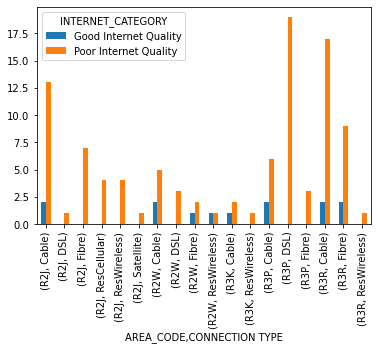

In [60]:
SelectedAreaCode.plot(kind = 'bar')

<AxesSubplot:xlabel='AREA_CODE,CONNECTION TYPE'>

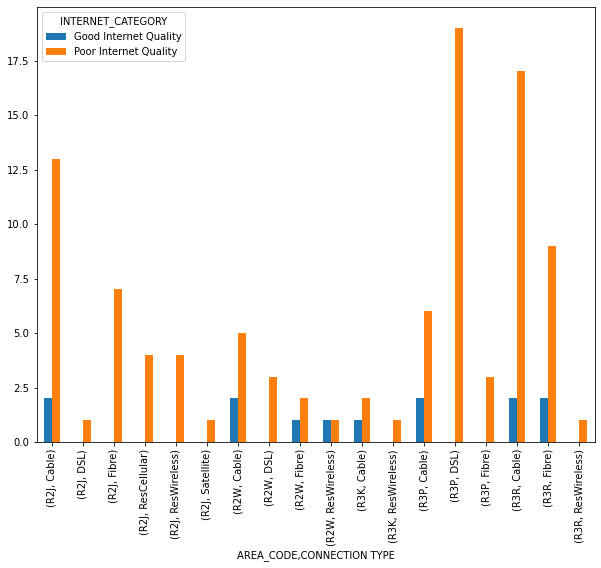

In [61]:
SelectedAreaCode.plot(kind = 'bar', figsize = (10, 8))

# BLANK

## ANALYSIS BASED ON MONTHLY COST......¶

In [62]:
monthly_Cost_TypeData = northEndConnect_DropInEffective_Columns[['TEST ID', 'TEST DATE', 'TEST TIME','DOWNLOAD SPEED', 'UPLOAD SPEED',
                                                             'JITTER', 'LATENCY', 'PACKET LOSS','ISP','CLIENT IP', 'CLIENT CITY',
                                                             'CONTRACTED MONTHLY COST', 'AREA_CODE', 'INTERNET_CATEGORY']]

In [63]:
monthly_Cost_TypeData

,TEST ID,TEST DATE,TEST TIME,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,ISP,CLIENT IP,CLIENT CITY,CONTRACTED MONTHLY COST,AREA_CODE,INTERNET_CATEGORY
0,805747,9/15/2019,16:46,193.17,19.75,1.48,34.36,0.52,Shaw Communications,24.76.169.124,Winnipeg,NaN,R2K,Poor Internet Quality
1,805777,9/15/2019,20:08,57.92,16.05,2.81,40.71,0.00,Shaw Communications,24.78.144.224,Winnipeg,NaN,R3R,Good Internet Quality
2,805828,9/16/2019,1:06,2.17,10.92,11.99,51.75,1.63,Shaw Communications,24.77.12.254,Winnipeg,NaN,R3Y,Poor Internet Quality
3,806633,9/17/2019,23:16,26.92,14.23,7.10,57.43,0.02,Shaw Communications,24.76.180.53,Winnipeg,90,R2H,Poor Internet Quality
4,808371,9/21/2019,4:22,14.34,3.74,2.07,62.16,1.10,Bell MTS,142.160.121.244,Winnipeg,90,R3M,Poor Internet Quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,1625869,1/3/2023,23:24,407.27,101.35,0.24,31.73,3.24,Shaw Communications,50.72.68.36,Winnipeg,NaN,R2V,Poor Internet Quality
11256,1625902,1/4/2023,1:42,232.57,49.63,8.14,68.51,1.80,Shaw Communications,50.70.253.95,Winnipeg,NaN,R2W,Poor Internet Quality
11257,1625936,1/4/2023,3:06,399.82,28.64,0.44,24.22,17.22,Bell Canada,142.161.117.133,Winnipeg,NaN,R3R,Poor Internet Quality
11258,1625939,1/4/2023,3:08,420.26,24.28,0.30,35.07,2.55,Bell Canada,142.161.117.133,Winnipeg,NaN,R3R,Poor Internet Quality


In [64]:
monthly_Cost_TypeData.describe()

,TEST ID,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS
count,1.126000e+04,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000
mean,1.260113e+06,93.435877,21.124032,7.280282,47.475978,1.854734
std,2.109822e+05,111.872675,52.654188,53.671930,33.486746,4.230011
min,8.057470e+05,0.020000,0.000000,0.010000,0.100000,0.000000
25%,1.193333e+06,16.840000,2.580000,0.900000,36.070000,0.000000
50%,1.219186e+06,53.345000,7.300000,2.050000,40.460000,0.040000
75%,1.410876e+06,118.622500,14.950000,5.120000,53.982500,1.220000
max,1.625940e+06,941.740000,932.900000,4368.640000,1542.320000,47.850000


In [65]:
# Replace the values in the CONTRACTED MONTHLY COST column that are not
# represented as numbers

for value in monthly_Cost_TypeData['CONTRACTED MONTHLY COST']:
    if(value == '<5'):
        monthly_Cost_TypeData['CONTRACTED MONTHLY COST'].replace(to_replace = '<5', value = '4.99', inplace = True)
        
    elif(value == '>200'):
        monthly_Cost_TypeData['CONTRACTED MONTHLY COST'].replace(to_replace = '>200', value = '201', inplace = True)
        
    else:
        pass
        

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [66]:
monthly_Cost_TypeData['CONTRACTED MONTHLY COST'].unique()

array([nan, '90', '55', '50', '200', '75', '160', '85', '125', '70', '80',
       '105', '100', '110', '60', '35', '130', '65', '45', '180', '40',
       '95', '120', '135', '150', '30', '25', '115', '155', '201', '140',
       '10', '170', '190', '4.99', '20'], dtype=object)

In [67]:
monthly_Cost_TypeData.isnull().sum()/len(monthly_Cost_TypeData) * 100

TEST ID                     0.000000
TEST DATE                   0.000000
TEST TIME                   0.000000
DOWNLOAD SPEED              0.000000
UPLOAD SPEED                0.000000
JITTER                      0.000000
LATENCY                     0.000000
PACKET LOSS                 0.000000
ISP                         0.000000
CLIENT IP                   0.000000
CLIENT CITY                 0.000000
CONTRACTED MONTHLY COST    79.280639
AREA_CODE                   0.000000
INTERNET_CATEGORY           0.000000
dtype: float64

In [68]:
# Drop data points that connect to missing data for Monthly Cost Type

monthly_Cost_TypeData.dropna(subset = ['CONTRACTED MONTHLY COST'], inplace = True)

C:\Users\USER\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [69]:
monthly_Cost_TypeData

,TEST ID,TEST DATE,TEST TIME,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,ISP,CLIENT IP,CLIENT CITY,CONTRACTED MONTHLY COST,AREA_CODE,INTERNET_CATEGORY
3,806633,9/17/2019,23:16,26.92,14.23,7.10,57.43,0.02,Shaw Communications,24.76.180.53,Winnipeg,90,R2H,Poor Internet Quality
4,808371,9/21/2019,4:22,14.34,3.74,2.07,62.16,1.10,Bell MTS,142.160.121.244,Winnipeg,90,R3M,Poor Internet Quality
8,812598,10/9/2019,5:21,42.28,5.07,0.31,64.68,0.06,Bell MTS,142.160.56.220,Winnipeg,90,R2P,Poor Internet Quality
12,814993,10/24/2019,20:10,0.19,0.33,157.49,42.84,10.62,Shaw Communications,24.76.197.198,Winnipeg,55,R3M,Poor Internet Quality
13,815888,10/31/2019,4:15,75.57,7.95,2.37,8.12,4.28,TekSavvy Solutions,104.246.135.239,Winnipeg,50,R3K,Poor Internet Quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11237,1625489,1/2/2023,16:07,7.18,1.65,4.16,100.03,11.30,Bell Canada,142.161.107.145,Winnipeg,90,R3J,Poor Internet Quality
11238,1625491,1/2/2023,16:08,7.26,1.43,0.56,112.14,8.88,Bell Canada,142.161.107.145,Winnipeg,90,R3J,Poor Internet Quality
11239,1625492,1/2/2023,16:08,8.83,1.60,1.41,147.97,5.63,Bell Canada,142.161.107.145,Winnipeg,90,R3J,Poor Internet Quality
11240,1625493,1/2/2023,16:09,8.62,1.76,1.06,85.54,8.55,Bell Canada,142.161.107.145,Winnipeg,90,R3J,Poor Internet Quality


In [70]:
monthly_Cost_TypeData.reset_index(inplace = True)

In [71]:
monthly_Cost_TypeData

,index,TEST ID,TEST DATE,TEST TIME,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,ISP,CLIENT IP,CLIENT CITY,CONTRACTED MONTHLY COST,AREA_CODE,INTERNET_CATEGORY
0,3,806633,9/17/2019,23:16,26.92,14.23,7.10,57.43,0.02,Shaw Communications,24.76.180.53,Winnipeg,90,R2H,Poor Internet Quality
1,4,808371,9/21/2019,4:22,14.34,3.74,2.07,62.16,1.10,Bell MTS,142.160.121.244,Winnipeg,90,R3M,Poor Internet Quality
2,8,812598,10/9/2019,5:21,42.28,5.07,0.31,64.68,0.06,Bell MTS,142.160.56.220,Winnipeg,90,R2P,Poor Internet Quality
3,12,814993,10/24/2019,20:10,0.19,0.33,157.49,42.84,10.62,Shaw Communications,24.76.197.198,Winnipeg,55,R3M,Poor Internet Quality
4,13,815888,10/31/2019,4:15,75.57,7.95,2.37,8.12,4.28,TekSavvy Solutions,104.246.135.239,Winnipeg,50,R3K,Poor Internet Quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,11237,1625489,1/2/2023,16:07,7.18,1.65,4.16,100.03,11.30,Bell Canada,142.161.107.145,Winnipeg,90,R3J,Poor Internet Quality
2329,11238,1625491,1/2/2023,16:08,7.26,1.43,0.56,112.14,8.88,Bell Canada,142.161.107.145,Winnipeg,90,R3J,Poor Internet Quality
2330,11239,1625492,1/2/2023,16:08,8.83,1.60,1.41,147.97,5.63,Bell Canada,142.161.107.145,Winnipeg,90,R3J,Poor Internet Quality
2331,11240,1625493,1/2/2023,16:09,8.62,1.76,1.06,85.54,8.55,Bell Canada,142.161.107.145,Winnipeg,90,R3J,Poor Internet Quality


In [72]:
monthly_Cost_TypeData.drop(columns = ['index'], inplace = True)

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [73]:
monthly_Cost_TypeData

,TEST ID,TEST DATE,TEST TIME,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,ISP,CLIENT IP,CLIENT CITY,CONTRACTED MONTHLY COST,AREA_CODE,INTERNET_CATEGORY
0,806633,9/17/2019,23:16,26.92,14.23,7.10,57.43,0.02,Shaw Communications,24.76.180.53,Winnipeg,90,R2H,Poor Internet Quality
1,808371,9/21/2019,4:22,14.34,3.74,2.07,62.16,1.10,Bell MTS,142.160.121.244,Winnipeg,90,R3M,Poor Internet Quality
2,812598,10/9/2019,5:21,42.28,5.07,0.31,64.68,0.06,Bell MTS,142.160.56.220,Winnipeg,90,R2P,Poor Internet Quality
3,814993,10/24/2019,20:10,0.19,0.33,157.49,42.84,10.62,Shaw Communications,24.76.197.198,Winnipeg,55,R3M,Poor Internet Quality
4,815888,10/31/2019,4:15,75.57,7.95,2.37,8.12,4.28,TekSavvy Solutions,104.246.135.239,Winnipeg,50,R3K,Poor Internet Quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,1625489,1/2/2023,16:07,7.18,1.65,4.16,100.03,11.30,Bell Canada,142.161.107.145,Winnipeg,90,R3J,Poor Internet Quality
2329,1625491,1/2/2023,16:08,7.26,1.43,0.56,112.14,8.88,Bell Canada,142.161.107.145,Winnipeg,90,R3J,Poor Internet Quality
2330,1625492,1/2/2023,16:08,8.83,1.60,1.41,147.97,5.63,Bell Canada,142.161.107.145,Winnipeg,90,R3J,Poor Internet Quality
2331,1625493,1/2/2023,16:09,8.62,1.76,1.06,85.54,8.55,Bell Canada,142.161.107.145,Winnipeg,90,R3J,Poor Internet Quality


In [74]:
# Categorize the Contracted Monthly Cost into brackets

monthly_Cost_Category = monthly_Cost_TypeData

costStatus = ''
cost_Category = []

for value in (monthly_Cost_Category['CONTRACTED MONTHLY COST']):
    
    if(float(value) <= 10):
        costStatus = '10 CAD or Less'
            
    elif(float(value) >= 11) and (float(value) <= 30):
        costStatus = 'From 11 to 30 CAD'
            
    elif(float(value) >= 31) and (float(value) <= 60):
        costStatus = 'From 31 to 60 CAD'
            
    elif(float(value) >= 61) and (float(value) <= 90):
        costStatus = 'From 61 to 90 CAD'
            
    elif(float(value) >= 91) and (float(value) <= 120):
        costStatus = 'From 91 to 120 CAD'
                
    elif(float(value) >= 121) and (float(value) <= 150):
        costStatus = 'From 121 to 150 CAD'
                
    elif(float(value) >= 151) and (float(value) <= 180):
        costStatus = 'From 151 to 180 CAD'
                
    elif(float(value) >= 181) and (float(value) >= 200):
        costStatus = 'From 181 to 200 CAD'
                
    elif(float(value) > 200):
        costStatus = 'More than 200 CAD'
        
        
    else:
        
        costStatus = "Not a Value"
        

    cost_Category.append(costStatus)   
        
monthly_Cost_Category["MONTHLY COST CATEGORY"] = cost_Category    

<ipython-input-74-5e73bb1433d5>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_Cost_Category["MONTHLY COST CATEGORY"] = cost_Category


In [75]:
monthly_Cost_Category

,TEST ID,TEST DATE,TEST TIME,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,ISP,CLIENT IP,CLIENT CITY,CONTRACTED MONTHLY COST,AREA_CODE,INTERNET_CATEGORY,MONTHLY COST CATEGORY
0,806633,9/17/2019,23:16,26.92,14.23,7.10,57.43,0.02,Shaw Communications,24.76.180.53,Winnipeg,90,R2H,Poor Internet Quality,From 61 to 90 CAD
1,808371,9/21/2019,4:22,14.34,3.74,2.07,62.16,1.10,Bell MTS,142.160.121.244,Winnipeg,90,R3M,Poor Internet Quality,From 61 to 90 CAD
2,812598,10/9/2019,5:21,42.28,5.07,0.31,64.68,0.06,Bell MTS,142.160.56.220,Winnipeg,90,R2P,Poor Internet Quality,From 61 to 90 CAD
3,814993,10/24/2019,20:10,0.19,0.33,157.49,42.84,10.62,Shaw Communications,24.76.197.198,Winnipeg,55,R3M,Poor Internet Quality,From 31 to 60 CAD
4,815888,10/31/2019,4:15,75.57,7.95,2.37,8.12,4.28,TekSavvy Solutions,104.246.135.239,Winnipeg,50,R3K,Poor Internet Quality,From 31 to 60 CAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,1625489,1/2/2023,16:07,7.18,1.65,4.16,100.03,11.30,Bell Canada,142.161.107.145,Winnipeg,90,R3J,Poor Internet Quality,From 61 to 90 CAD
2329,1625491,1/2/2023,16:08,7.26,1.43,0.56,112.14,8.88,Bell Canada,142.161.107.145,Winnipeg,90,R3J,Poor Internet Quality,From 61 to 90 CAD
2330,1625492,1/2/2023,16:08,8.83,1.60,1.41,147.97,5.63,Bell Canada,142.161.107.145,Winnipeg,90,R3J,Poor Internet Quality,From 61 to 90 CAD
2331,1625493,1/2/2023,16:09,8.62,1.76,1.06,85.54,8.55,Bell Canada,142.161.107.145,Winnipeg,90,R3J,Poor Internet Quality,From 61 to 90 CAD


In [76]:
# There is need to check that the test was performed for each IP Address at MOST
# ONCE FOR EACH MONTH IN EACH YEAR. EACH IP ADDRESS IN A MONTH MUST BE TESTED ONLY ONCE.
# Where there is a test of more than one per month for each IP Adrress, ONE RECORD WILL BE DELETED

monthly_Cost_Category_dropREPEATED_DAILYTEST = monthly_Cost_Category.drop_duplicates(subset = ['CLIENT IP', 'TEST DATE'])

In [77]:
monthly_Cost_Category_dropREPEATED_DAILYTEST 

,TEST ID,TEST DATE,TEST TIME,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,ISP,CLIENT IP,CLIENT CITY,CONTRACTED MONTHLY COST,AREA_CODE,INTERNET_CATEGORY,MONTHLY COST CATEGORY
0,806633,9/17/2019,23:16,26.92,14.23,7.10,57.43,0.02,Shaw Communications,24.76.180.53,Winnipeg,90,R2H,Poor Internet Quality,From 61 to 90 CAD
1,808371,9/21/2019,4:22,14.34,3.74,2.07,62.16,1.10,Bell MTS,142.160.121.244,Winnipeg,90,R3M,Poor Internet Quality,From 61 to 90 CAD
2,812598,10/9/2019,5:21,42.28,5.07,0.31,64.68,0.06,Bell MTS,142.160.56.220,Winnipeg,90,R2P,Poor Internet Quality,From 61 to 90 CAD
3,814993,10/24/2019,20:10,0.19,0.33,157.49,42.84,10.62,Shaw Communications,24.76.197.198,Winnipeg,55,R3M,Poor Internet Quality,From 31 to 60 CAD
4,815888,10/31/2019,4:15,75.57,7.95,2.37,8.12,4.28,TekSavvy Solutions,104.246.135.239,Winnipeg,50,R3K,Poor Internet Quality,From 31 to 60 CAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2282,1624531,12/30/2022,21:30,6.24,2.08,6.92,382.26,0.00,Bell Canada,142.161.107.145,Winnipeg,90,R3J,Poor Internet Quality,From 61 to 90 CAD
2285,1624897,1/1/2023,4:53,7.76,1.75,5.49,124.26,2.04,Bell Canada,142.161.107.145,Winnipeg,90,R3J,Poor Internet Quality,From 61 to 90 CAD
2289,1625008,1/1/2023,15:23,50.44,4.73,0.51,59.54,5.19,Bell Canada,142.161.120.248,Winnipeg,120,R2V,Poor Internet Quality,From 91 to 120 CAD
2290,1625232,1/2/2023,1:30,4.27,1.95,4.35,46.67,1.28,Bell Canada,142.161.107.145,Winnipeg,90,R3J,Poor Internet Quality,From 61 to 90 CAD


In [78]:
monthly_Cost_Category_dropREPEATED_DAILYTEST.reset_index(inplace = True)
monthly_Cost_Category_dropREPEATED_DAILYTEST 

,index,TEST ID,TEST DATE,TEST TIME,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,ISP,CLIENT IP,CLIENT CITY,CONTRACTED MONTHLY COST,AREA_CODE,INTERNET_CATEGORY,MONTHLY COST CATEGORY
0,0,806633,9/17/2019,23:16,26.92,14.23,7.10,57.43,0.02,Shaw Communications,24.76.180.53,Winnipeg,90,R2H,Poor Internet Quality,From 61 to 90 CAD
1,1,808371,9/21/2019,4:22,14.34,3.74,2.07,62.16,1.10,Bell MTS,142.160.121.244,Winnipeg,90,R3M,Poor Internet Quality,From 61 to 90 CAD
2,2,812598,10/9/2019,5:21,42.28,5.07,0.31,64.68,0.06,Bell MTS,142.160.56.220,Winnipeg,90,R2P,Poor Internet Quality,From 61 to 90 CAD
3,3,814993,10/24/2019,20:10,0.19,0.33,157.49,42.84,10.62,Shaw Communications,24.76.197.198,Winnipeg,55,R3M,Poor Internet Quality,From 31 to 60 CAD
4,4,815888,10/31/2019,4:15,75.57,7.95,2.37,8.12,4.28,TekSavvy Solutions,104.246.135.239,Winnipeg,50,R3K,Poor Internet Quality,From 31 to 60 CAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,2282,1624531,12/30/2022,21:30,6.24,2.08,6.92,382.26,0.00,Bell Canada,142.161.107.145,Winnipeg,90,R3J,Poor Internet Quality,From 61 to 90 CAD
1041,2285,1624897,1/1/2023,4:53,7.76,1.75,5.49,124.26,2.04,Bell Canada,142.161.107.145,Winnipeg,90,R3J,Poor Internet Quality,From 61 to 90 CAD
1042,2289,1625008,1/1/2023,15:23,50.44,4.73,0.51,59.54,5.19,Bell Canada,142.161.120.248,Winnipeg,120,R2V,Poor Internet Quality,From 91 to 120 CAD
1043,2290,1625232,1/2/2023,1:30,4.27,1.95,4.35,46.67,1.28,Bell Canada,142.161.107.145,Winnipeg,90,R3J,Poor Internet Quality,From 61 to 90 CAD


In [79]:
monthly_Cost_Category_dropREPEATED_DAILYTEST.drop(columns = ['index'], inplace = True) 

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [80]:
monthly_Cost_Category_dropREPEATED_DAILYTEST 

,TEST ID,TEST DATE,TEST TIME,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,ISP,CLIENT IP,CLIENT CITY,CONTRACTED MONTHLY COST,AREA_CODE,INTERNET_CATEGORY,MONTHLY COST CATEGORY
0,806633,9/17/2019,23:16,26.92,14.23,7.10,57.43,0.02,Shaw Communications,24.76.180.53,Winnipeg,90,R2H,Poor Internet Quality,From 61 to 90 CAD
1,808371,9/21/2019,4:22,14.34,3.74,2.07,62.16,1.10,Bell MTS,142.160.121.244,Winnipeg,90,R3M,Poor Internet Quality,From 61 to 90 CAD
2,812598,10/9/2019,5:21,42.28,5.07,0.31,64.68,0.06,Bell MTS,142.160.56.220,Winnipeg,90,R2P,Poor Internet Quality,From 61 to 90 CAD
3,814993,10/24/2019,20:10,0.19,0.33,157.49,42.84,10.62,Shaw Communications,24.76.197.198,Winnipeg,55,R3M,Poor Internet Quality,From 31 to 60 CAD
4,815888,10/31/2019,4:15,75.57,7.95,2.37,8.12,4.28,TekSavvy Solutions,104.246.135.239,Winnipeg,50,R3K,Poor Internet Quality,From 31 to 60 CAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,1624531,12/30/2022,21:30,6.24,2.08,6.92,382.26,0.00,Bell Canada,142.161.107.145,Winnipeg,90,R3J,Poor Internet Quality,From 61 to 90 CAD
1041,1624897,1/1/2023,4:53,7.76,1.75,5.49,124.26,2.04,Bell Canada,142.161.107.145,Winnipeg,90,R3J,Poor Internet Quality,From 61 to 90 CAD
1042,1625008,1/1/2023,15:23,50.44,4.73,0.51,59.54,5.19,Bell Canada,142.161.120.248,Winnipeg,120,R2V,Poor Internet Quality,From 91 to 120 CAD
1043,1625232,1/2/2023,1:30,4.27,1.95,4.35,46.67,1.28,Bell Canada,142.161.107.145,Winnipeg,90,R3J,Poor Internet Quality,From 61 to 90 CAD


In [81]:
# Retieve data for Winnipeg Area only....

# Retrieve the data for the Client City name containing Winnipeg. . . . 

WinnipegArea_MonthlyCost = monthly_Cost_Category_dropREPEATED_DAILYTEST[monthly_Cost_Category_dropREPEATED_DAILYTEST['CLIENT CITY'].str.contains('Winnipeg', case = False, na = False)]

In [82]:
WinnipegArea_MonthlyCost

,TEST ID,TEST DATE,TEST TIME,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,ISP,CLIENT IP,CLIENT CITY,CONTRACTED MONTHLY COST,AREA_CODE,INTERNET_CATEGORY,MONTHLY COST CATEGORY
0,806633,9/17/2019,23:16,26.92,14.23,7.10,57.43,0.02,Shaw Communications,24.76.180.53,Winnipeg,90,R2H,Poor Internet Quality,From 61 to 90 CAD
1,808371,9/21/2019,4:22,14.34,3.74,2.07,62.16,1.10,Bell MTS,142.160.121.244,Winnipeg,90,R3M,Poor Internet Quality,From 61 to 90 CAD
2,812598,10/9/2019,5:21,42.28,5.07,0.31,64.68,0.06,Bell MTS,142.160.56.220,Winnipeg,90,R2P,Poor Internet Quality,From 61 to 90 CAD
3,814993,10/24/2019,20:10,0.19,0.33,157.49,42.84,10.62,Shaw Communications,24.76.197.198,Winnipeg,55,R3M,Poor Internet Quality,From 31 to 60 CAD
4,815888,10/31/2019,4:15,75.57,7.95,2.37,8.12,4.28,TekSavvy Solutions,104.246.135.239,Winnipeg,50,R3K,Poor Internet Quality,From 31 to 60 CAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1623653,12/28/2022,14:32,48.83,4.72,1.51,41.24,6.52,Bell Canada,142.161.120.248,Winnipeg,120,R2V,Poor Internet Quality,From 91 to 120 CAD
1040,1624531,12/30/2022,21:30,6.24,2.08,6.92,382.26,0.00,Bell Canada,142.161.107.145,Winnipeg,90,R3J,Poor Internet Quality,From 61 to 90 CAD
1041,1624897,1/1/2023,4:53,7.76,1.75,5.49,124.26,2.04,Bell Canada,142.161.107.145,Winnipeg,90,R3J,Poor Internet Quality,From 61 to 90 CAD
1042,1625008,1/1/2023,15:23,50.44,4.73,0.51,59.54,5.19,Bell Canada,142.161.120.248,Winnipeg,120,R2V,Poor Internet Quality,From 91 to 120 CAD


In [83]:
WinnipegArea_MonthlyCost.reset_index(inplace = True)
WinnipegArea_MonthlyCost.drop(columns = ['index'], inplace = True)

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [84]:
WinnipegArea_MonthlyCost

,TEST ID,TEST DATE,TEST TIME,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,ISP,CLIENT IP,CLIENT CITY,CONTRACTED MONTHLY COST,AREA_CODE,INTERNET_CATEGORY,MONTHLY COST CATEGORY
0,806633,9/17/2019,23:16,26.92,14.23,7.10,57.43,0.02,Shaw Communications,24.76.180.53,Winnipeg,90,R2H,Poor Internet Quality,From 61 to 90 CAD
1,808371,9/21/2019,4:22,14.34,3.74,2.07,62.16,1.10,Bell MTS,142.160.121.244,Winnipeg,90,R3M,Poor Internet Quality,From 61 to 90 CAD
2,812598,10/9/2019,5:21,42.28,5.07,0.31,64.68,0.06,Bell MTS,142.160.56.220,Winnipeg,90,R2P,Poor Internet Quality,From 61 to 90 CAD
3,814993,10/24/2019,20:10,0.19,0.33,157.49,42.84,10.62,Shaw Communications,24.76.197.198,Winnipeg,55,R3M,Poor Internet Quality,From 31 to 60 CAD
4,815888,10/31/2019,4:15,75.57,7.95,2.37,8.12,4.28,TekSavvy Solutions,104.246.135.239,Winnipeg,50,R3K,Poor Internet Quality,From 31 to 60 CAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,1623653,12/28/2022,14:32,48.83,4.72,1.51,41.24,6.52,Bell Canada,142.161.120.248,Winnipeg,120,R2V,Poor Internet Quality,From 91 to 120 CAD
1005,1624531,12/30/2022,21:30,6.24,2.08,6.92,382.26,0.00,Bell Canada,142.161.107.145,Winnipeg,90,R3J,Poor Internet Quality,From 61 to 90 CAD
1006,1624897,1/1/2023,4:53,7.76,1.75,5.49,124.26,2.04,Bell Canada,142.161.107.145,Winnipeg,90,R3J,Poor Internet Quality,From 61 to 90 CAD
1007,1625008,1/1/2023,15:23,50.44,4.73,0.51,59.54,5.19,Bell Canada,142.161.120.248,Winnipeg,120,R2V,Poor Internet Quality,From 91 to 120 CAD


In [85]:
WinnipegArea_MonthlyCost['CONTRACTED MONTHLY COST'].unique()

array(['90', '55', '50', '200', '75', '160', '85', '125', '70', '80',
       '105', '100', '110', '60', '130', '65', '45', '35', '180', '40',
       '95', '120', '135', '150', '30', '25', '155', '115', '201', '140',
       '10', '170', '190', '4.99', '20'], dtype=object)

In [86]:
WinnipegArea_MonthlyCost.groupby(['AREA_CODE', 'INTERNET_CATEGORY'])['MONTHLY COST CATEGORY'].value_counts()

AREA_CODE  INTERNET_CATEGORY      MONTHLY COST CATEGORY
J0S        Poor Internet Quality  From 121 to 150 CAD       1
R2C        Good Internet Quality  From 31 to 60 CAD         1
                                  From 61 to 90 CAD         1
                                  From 91 to 120 CAD        1
           Poor Internet Quality  From 91 to 120 CAD       16
                                                           ..
R3Y        Poor Internet Quality  From 91 to 120 CAD        8
                                  From 31 to 60 CAD         2
                                  From 121 to 150 CAD       1
                                  From 181 to 200 CAD       1
R5A        Poor Internet Quality  10 CAD or Less            1
Name: MONTHLY COST CATEGORY, Length: 205, dtype: int64

In [87]:
SelectedAreaCode1 = WinnipegArea_MonthlyCost[WinnipegArea_MonthlyCost['AREA_CODE'].isin(['R2J','R3K','R3P','R3R','R2W'])]

In [88]:
SelectedAreaCode = SelectedAreaCode1.groupby(['AREA_CODE', 'MONTHLY COST CATEGORY'])['INTERNET_CATEGORY'].value_counts().unstack()

In [89]:
SelectedAreaCode

INTERNET_CATEGORY                Good Internet Quality  Poor Internet Quality
AREA_CODE MONTHLY COST CATEGORY                                              
R2J       From 121 to 150 CAD                      NaN                    2.0
          From 151 to 180 CAD                      NaN                    1.0
          From 181 to 200 CAD                      NaN                    4.0
          From 31 to 60 CAD                        NaN                    2.0
          From 61 to 90 CAD                        NaN                    4.0
          From 91 to 120 CAD                       1.0                    7.0
R2W       From 121 to 150 CAD                      NaN                    4.0
          From 181 to 200 CAD                      NaN                    1.0
          From 31 to 60 CAD                        NaN                    4.0
          From 61 to 90 CAD                        2.0                    4.0
          From 91 to 120 CAD                       4.0                    4.0
R3K       From 121 to 150 CAD                      2.0                    NaN
          From 31 to 60 CAD                        NaN                    2.0
          From 61 to 90 CAD                        NaN                    7.0
          From 91 to 120 CAD                       1.0                    3.0
R3P       From 121 to 150 CAD                      NaN                    3.0
          From 151 to 180 CAD                      NaN                    2.0
          From 181 to 200 CAD                      1.0                    1.0
          From 31 to 60 CAD                        NaN                    4.0
          From 61 to 90 CAD                        1.0                    5.0
          From 91 to 120 CAD                       NaN                   26.0
R3R       From 181 to 200 CAD                      NaN                    1.0
          From 31 to 60 CAD                        NaN                    5.0
          From 61 to 90 CAD                        3.0                   19.0
          From 91 to 120 CAD                       1.0                   18.0

In [90]:
# Replace the missing values with values of zero

SelectedAreaCode['Good Internet Quality'].fillna(0, inplace = True)

SelectedAreaCode['Poor Internet Quality'].fillna(0, inplace = True)

In [91]:
SelectedAreaCode

INTERNET_CATEGORY                Good Internet Quality  Poor Internet Quality
AREA_CODE MONTHLY COST CATEGORY                                              
R2J       From 121 to 150 CAD                      0.0                    2.0
          From 151 to 180 CAD                      0.0                    1.0
          From 181 to 200 CAD                      0.0                    4.0
          From 31 to 60 CAD                        0.0                    2.0
          From 61 to 90 CAD                        0.0                    4.0
          From 91 to 120 CAD                       1.0                    7.0
R2W       From 121 to 150 CAD                      0.0                    4.0
          From 181 to 200 CAD                      0.0                    1.0
          From 31 to 60 CAD                        0.0                    4.0
          From 61 to 90 CAD                        2.0                    4.0
          From 91 to 120 CAD                       4.0                    4.0
R3K       From 121 to 150 CAD                      2.0                    0.0
          From 31 to 60 CAD                        0.0                    2.0
          From 61 to 90 CAD                        0.0                    7.0
          From 91 to 120 CAD                       1.0                    3.0
R3P       From 121 to 150 CAD                      0.0                    3.0
          From 151 to 180 CAD                      0.0                    2.0
          From 181 to 200 CAD                      1.0                    1.0
          From 31 to 60 CAD                        0.0                    4.0
          From 61 to 90 CAD                        1.0                    5.0
          From 91 to 120 CAD                       0.0                   26.0
R3R       From 181 to 200 CAD                      0.0                    1.0
          From 31 to 60 CAD                        0.0                    5.0
          From 61 to 90 CAD                        3.0                   19.0
          From 91 to 120 CAD                       1.0                   18.0

<AxesSubplot:xlabel='AREA_CODE,MONTHLY COST CATEGORY'>

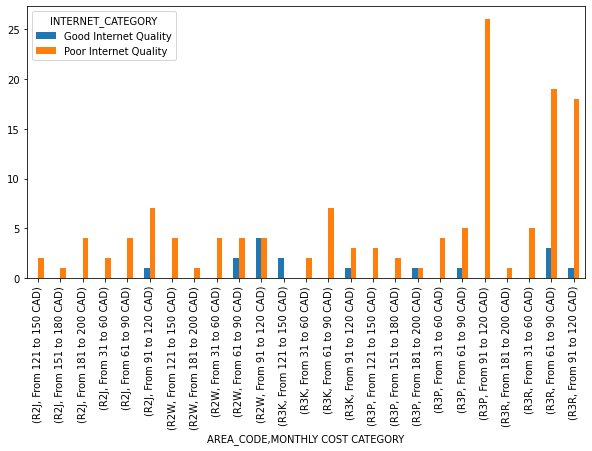

In [92]:
SelectedAreaCode.plot.bar(figsize=(10, 5))

In [93]:
SelectedAreaCode2 = SelectedAreaCode1.groupby(['AREA_CODE', 'INTERNET_CATEGORY'])['MONTHLY COST CATEGORY'].value_counts().unstack()

<AxesSubplot:xlabel='AREA_CODE,INTERNET_CATEGORY'>

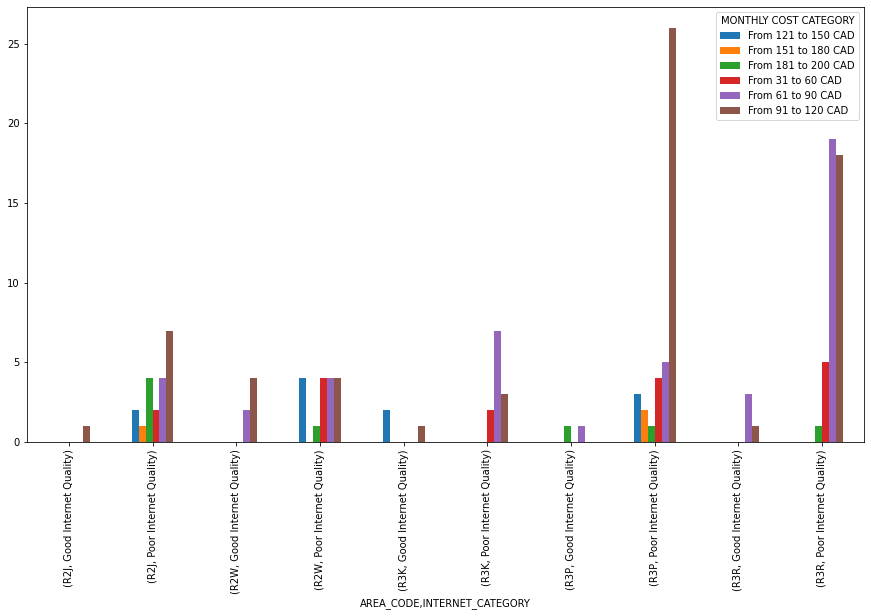

In [94]:
SelectedAreaCode2.plot.bar(figsize = (15,8))